In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2

In [17]:
import os.path
from torch.utils.data import DataLoader
from project_function import SummaryDataSet, split_data, TitlePartyModel, run_n_epochs, plot_losses, get_test_results
import torch


In [3]:
token_data_path = os.path.join(os.getcwd(), "..", "data", "tokenized")

In [4]:
resample_train_files, resample_validation_files, resample_test_files = split_data(token_data_path, "shrunk", 0.6)

train: summary_bill_1811_1392983-shrunk.pkl
train: summary_bill_1811_1392984-shrunk.pkl
validate summary_bill_1811_1392985-shrunk.pkl
train: summary_bill_1811_1392986-shrunk.pkl
train: summary_bill_1811_1392988-shrunk.pkl
validate summary_bill_1811_1392989-shrunk.pkl
test : summary_bill_1811_1392990-shrunk.pkl
train: summary_bill_1811_1392991-shrunk.pkl
validate summary_bill_1811_1392992-shrunk.pkl
validate summary_bill_1811_1392994-shrunk.pkl
train: summary_bill_1811_1392995-shrunk.pkl
train: summary_bill_1811_1392996-shrunk.pkl
test : summary_bill_1811_1392997-shrunk.pkl
train: summary_bill_1811_1393000-shrunk.pkl
validate summary_bill_1811_1393001-shrunk.pkl
train: summary_bill_1811_1393002-shrunk.pkl
test : summary_bill_1811_1393003-shrunk.pkl
test : summary_bill_1811_1393005-shrunk.pkl
test : summary_bill_1811_1393007-shrunk.pkl
test : summary_bill_1811_1393008-shrunk.pkl
test : summary_bill_1811_1393009-shrunk.pkl
train: summary_bill_1811_1393010-shrunk.pkl
train: summary_bill_18

In [5]:
print(f'{len(resample_train_files)} training files, {len(resample_validation_files)} validation files, {len(resample_test_files)} test files')

1179 training files, 406 validation files, 402 test files


In [6]:
single_resample_train_dataset = SummaryDataSet(resample_train_files, fixed_idx=True, allow_gpu=True, col_name="input_shrunk")
single_resample_validation_dataset = SummaryDataSet(resample_validation_files, fixed_idx=True, allow_gpu=True, col_name="input_shrunk")
single_resample_test_dataset = SummaryDataSet(resample_test_files, fixed_idx=True, allow_gpu=True, col_name="input_shrunk")

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392983-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392984-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392986-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392988-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392991-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392995-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392996-shrunk.pkl
loading C:\Users\benja\git-projects\bitbu

In [7]:
single_train_dataloader = DataLoader(single_resample_train_dataset, batch_size=1, shuffle=False)
#validate_dataloader = DataLoader(maxpool_validation_dataset, batch_size=1, shuffle=False)
single_validate_dataloader = DataLoader(single_resample_test_dataset, batch_size=1, shuffle=False)
single_test_dataloader = DataLoader(single_resample_train_dataset, batch_size=1, shuffle=False)

In [8]:
num_epochs = 10
single_resample_model = TitlePartyModel()
if torch.cuda.is_available():
    single_resample_model.cuda()
single_loss_fun_ms3e = torch.nn.MSELoss()
single_rms_optimizer = torch.optim.RMSprop(single_resample_model.parameters(), lr=0.0001, momentum=0.9)
single_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(single_rms_optimizer, milestones=range(2,num_epochs,2), gamma=0.95)

In [9]:
torch.autograd.set_detect_anomaly(True)
single_checkpoint, single_train_losses, single_validation_losses = run_n_epochs(num_epochs,
                                                          single_resample_model,
                                                          single_loss_fun_ms3e,
                                                          single_rms_optimizer,
                                                          single_train_dataloader,
                                                          single_validate_dataloader,
                                                          "resample_single",
                                                          single_lrd_schedulers)

epoch 0
turn on training
running one epoch


C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\project_function.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(x)


tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.2608, 0.2532, 0.2892, 0.1967]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.1832268387079239
turn off training
epoch loss 0.1832268387079239
applying model.eval()
LOSS train 0.1832268387079239 valid 0.25479668378829956
stepping scheduler
epoch 1
turn on training
running one epoch
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.5713, 0.1455, 0.1804, 0.1028]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.06202905997633934
turn off training
epoch loss 0.06202905997633934
applying model.eval()
LOSS train 0.06202905997633934 valid 0.37992149591445923
stepping scheduler
epoch 2
turn on training
running one epoch
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.8220, 0.0610, 0.0794, 0.0377]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.010784579440951347
turn off training
epoch loss 0.010784579440951347
applying model.eval()
LOSS train 0.010784579440951

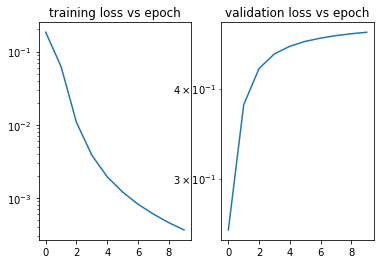

In [11]:
plot_losses(single_train_losses, single_validation_losses)

In [12]:
full_resample_train_dataset = SummaryDataSet(resample_train_files, fixed_idx=False, allow_gpu=True, col_name="input_shrunk")
full_resample_validation_dataset = SummaryDataSet(resample_validation_files, fixed_idx=False, allow_gpu=True, col_name="input_shrunk")
full_resample_test_dataset = SummaryDataSet(resample_test_files, fixed_idx=False, allow_gpu=True, col_name="input_shrunk")
fulL_train_dataloader = DataLoader(full_resample_train_dataset, batch_size=1, shuffle=True)
#validate_dataloader = DataLoader(maxpool_validation_dataset, batch_size=1, shuffle=False)
full_validate_dataloader = DataLoader(full_resample_validation_dataset, batch_size=1, shuffle=False)
full_test_dataloader = DataLoader(full_resample_test_dataset, batch_size=1, shuffle=False)

loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392983-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392984-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392986-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392988-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392991-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392995-shrunk.pkl
loading C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\..\data\tokenized\summary_bill_1811_1392996-shrunk.pkl
loading C:\Users\benja\git-projects\bitbu

In [13]:
num_epochs = 50
resample_full_model = TitlePartyModel()
if torch.cuda.is_available():
    resample_full_model.cuda()
full_loss_fun_ms3e = torch.nn.MSELoss()
full_rms_optimizer = torch.optim.RMSprop(resample_full_model.parameters(), lr=0.0001, momentum=0.9)
full_lrd_schedulers = torch.optim.lr_scheduler.MultiStepLR(full_rms_optimizer, milestones=range(2,num_epochs,2), gamma=0.95)

In [14]:
full_checkpoint, full_train_losses, full_validation_losses, learning_rates = run_n_epochs(num_epochs,
                                                          resample_full_model,
                                                          full_loss_fun_ms3e,
                                                          full_rms_optimizer,
                                                          fulL_train_dataloader,
                                                          full_validate_dataloader,
                                                          "resample_full",
                                                          full_lrd_schedulers,
                                                          return_learning_rates=True)

epoch 0
turn on training
running one epoch
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.2321, 0.2704, 0.3126, 0.1850]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.19867399334907532


C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\project_function.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(x)


tensor([[0., 0., 1., 0.]], device='cuda:0') vs tensor([[0.3260, 0.0345, 0.3383, 0.3012]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.15899254381656647
tensor([[0., 0., 1., 0.]], device='cuda:0') vs tensor([[0.4351, 0.0193, 0.3231, 0.2225]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.17435809969902039
tensor([[0., 0., 1., 0.]], device='cuda:0') vs tensor([[0.4268, 0.0143, 0.3547, 0.2042]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.1601146161556244
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.4377, 0.0141, 0.3303, 0.2179]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.11825384199619293
tensor([[1., 0., 0., 0.]], device='cuda:0') vs tensor([[0.4349, 0.0112, 0.3493, 0.2046]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
last loss = 0.1208469420671463
tensor([[0., 0., 0., 1.]], device='cuda:0') vs tensor([[0.3490, 0.0092, 0.4125, 0.2293]], device='cuda:0',
       grad_fn=<SoftmaxBa

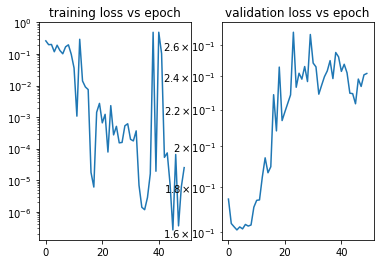

In [15]:
plot_losses(full_train_losses, full_validation_losses)

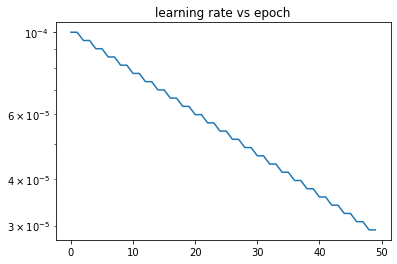

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(len(learning_rates)), learning_rates)
plt.yscale('log')
plt.title("learning rate vs epoch")
plt.show()

In [63]:
test_results_df = get_test_results(resample_full_model, full_test_dataloader)

C:\Users\benja\git-projects\bitbucket\nlp_legislation_prediction\training\project_function.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.output(x)


4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [64]:
test_results_df = test_results_df.reset_index()

In [65]:
test_results_df.head()

,index,input,output,expected_index,inferred_index
0,0,"[0.0, 0.0, 1.0, 0.0]","[0.024811735, 0.004954242, 0.032822717, 0.9374...",2,3
1,1,"[0.0, 0.0, 1.0, 0.0]","[1.1271758e-05, 3.51612e-05, 0.9993262, 0.0006...",2,2
2,2,"[1.0, 0.0, 0.0, 0.0]","[0.9917675, 0.00026414893, 0.0038918594, 0.004...",0,0
3,3,"[1.0, 0.0, 0.0, 0.0]","[0.05588505, 0.006865737, 0.8805778, 0.056671377]",0,2
4,4,"[0.0, 0.0, 1.0, 0.0]","[0.98937047, 0.0003312944, 0.0049687126, 0.005...",2,0


In [73]:
test_cf = pd.crosstab(test_results_df["expected_index"], test_results_df["inferred_index"], rownames=['Actual'], colnames=['Predicted'], margins=True)

In [74]:
test_cf

Predicted,0,2,3,All
Actual,,,,
0,86,31,42,159
2,55,58,41,154
3,35,19,35,89
All,176,108,118,402
